Imports

In [1]:
import numpy as np
import umap
from matplotlib import pyplot as plt

from load_data import load_fashion_mnist, load_clothing
from utils import one_hot_encode, FASHION_MNIST_LABELS, load_model

Load Fashion MNIST

In [2]:
x_train, y_train, x_test, y_test = load_fashion_mnist()
y_train_one_hot = one_hot_encode(y_train, 10)
y_test_one_hot = one_hot_encode(y_test, 10)

Load models

In [3]:
autoencoder = load_model('trained_models/autoencoder1.pkl')
autoencoder_regularized = load_model('trained_models/autoencoder1_regularized.pkl')
classifier = load_model('trained_models/classifier1.pkl')
classifier_from_encoded = load_model('trained_models/classifier1_from_encoded.pkl')

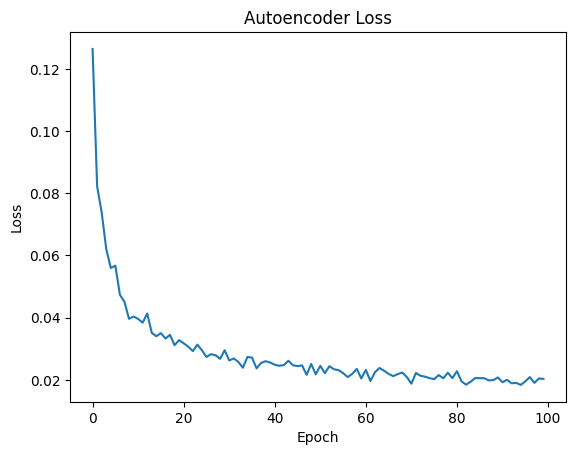

In [4]:
plot_x = range(0, 100)
plot_y = autoencoder.losses

plt.plot(plot_x, plot_y)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Autoencoder Loss')
plt.show()

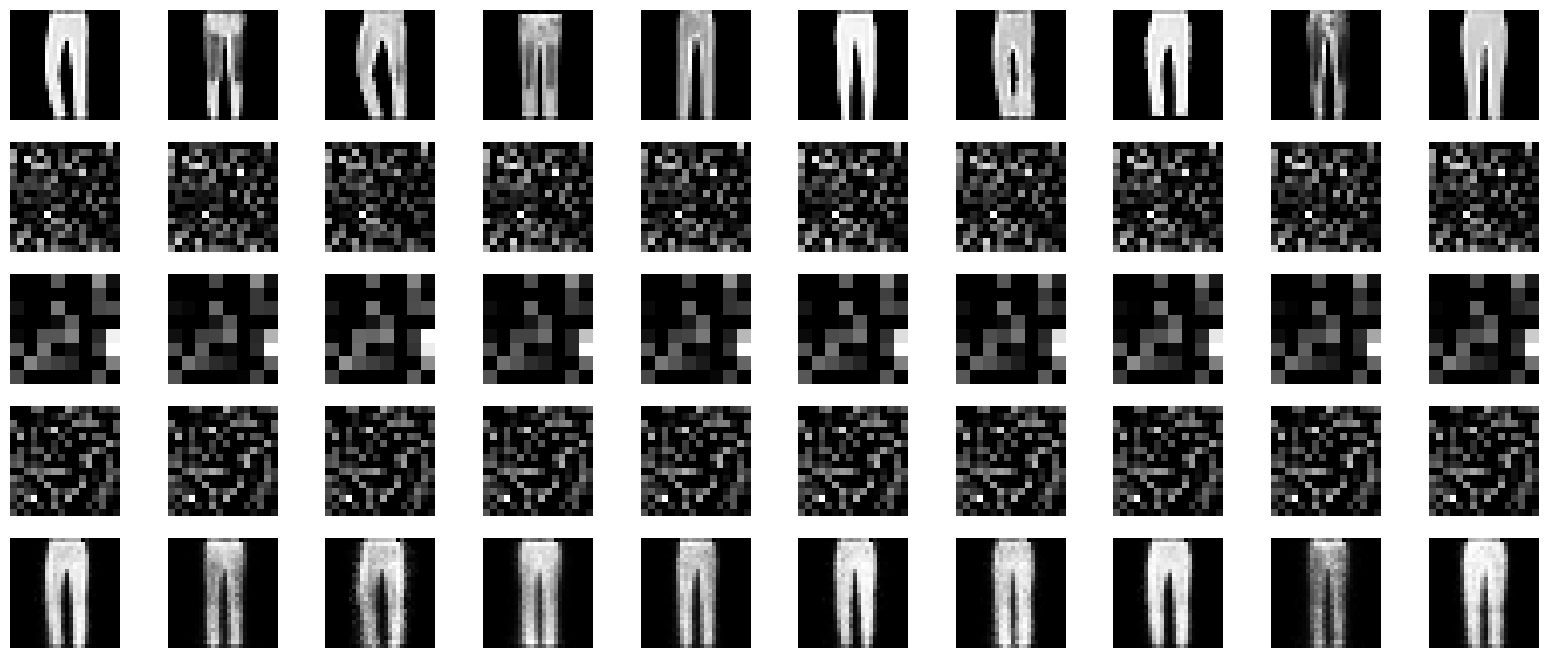

In [5]:
_, _, trouser_x_test, _ = load_clothing(1)

plt.figure(figsize=(20, 10))

for i in range(10):
    plt.subplot(6, 10, i + 1)
    plt.imshow(trouser_x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    output = autoencoder.forward(trouser_x_test[i])

    plt.subplot(6, 10, i + 11)
    plt.imshow(autoencoder.layers[0].outputs.reshape(16, 16), cmap='gray')
    plt.axis('off')

    plt.subplot(6, 10, i + 21)
    plt.imshow(autoencoder.layers[1].outputs.reshape(8, 8), cmap='gray')
    plt.axis('off')

    plt.subplot(6, 10, i + 31)
    plt.imshow(autoencoder.layers[2].outputs.reshape(16, 16), cmap='gray')
    plt.axis('off')

    plt.subplot(6, 10, i + 41)
    plt.imshow(output.reshape(28, 28), cmap='gray')
    plt.axis('off')

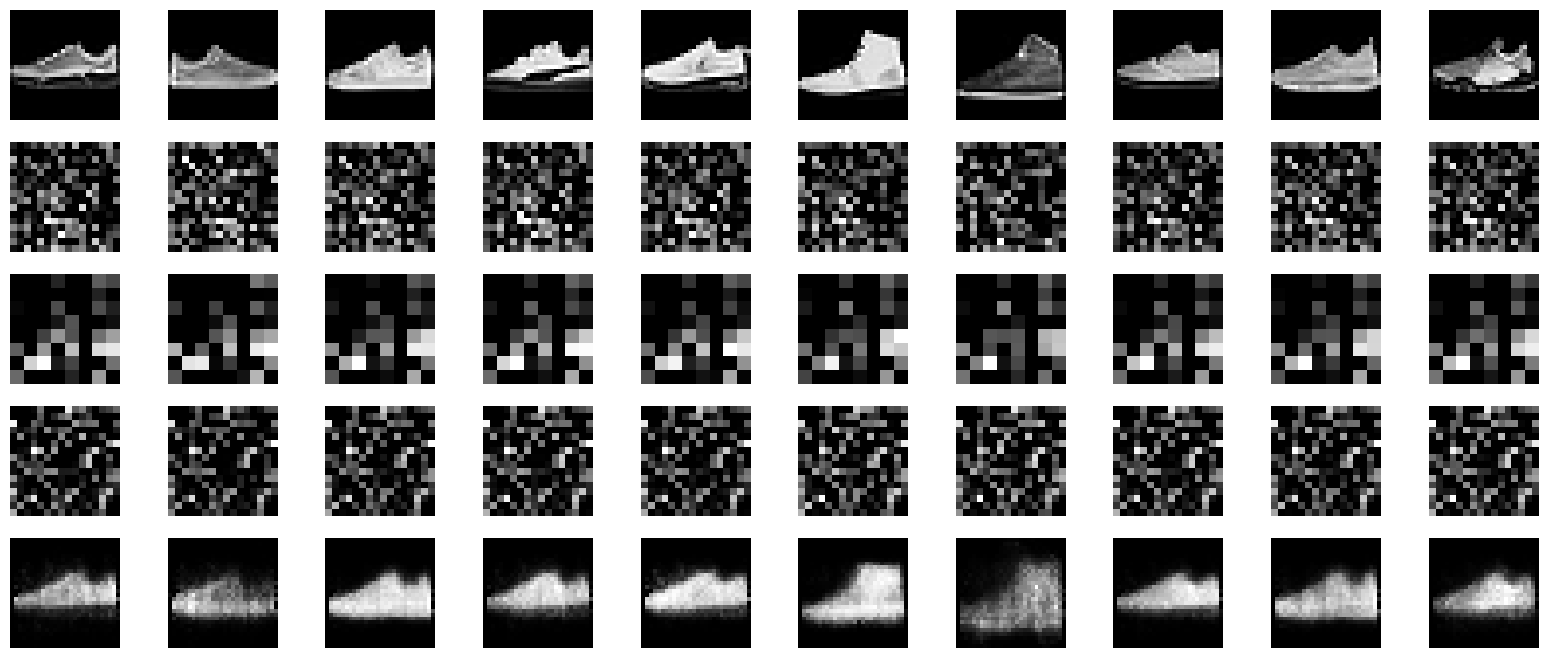

In [10]:
_, _, sneaker_x_test, _ = load_clothing(7)

plt.figure(figsize=(20, 10))

for i in range(10):
    plt.subplot(6, 10, i + 1)
    plt.imshow(sneaker_x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    output = autoencoder.forward(sneaker_x_test[i])

    plt.subplot(6, 10, i + 11)
    plt.imshow(autoencoder.layers[0].outputs.reshape(16, 16), cmap='gray')
    plt.axis('off')

    plt.subplot(6, 10, i + 21)
    plt.imshow(autoencoder.layers[1].outputs.reshape(8, 8), cmap='gray')
    plt.axis('off')

    plt.subplot(6, 10, i + 31)
    plt.imshow(autoencoder.layers[2].outputs.reshape(16, 16), cmap='gray')
    plt.axis('off')

    plt.subplot(6, 10, i + 41)
    plt.imshow(output.reshape(28, 28), cmap='gray')
    plt.axis('off')

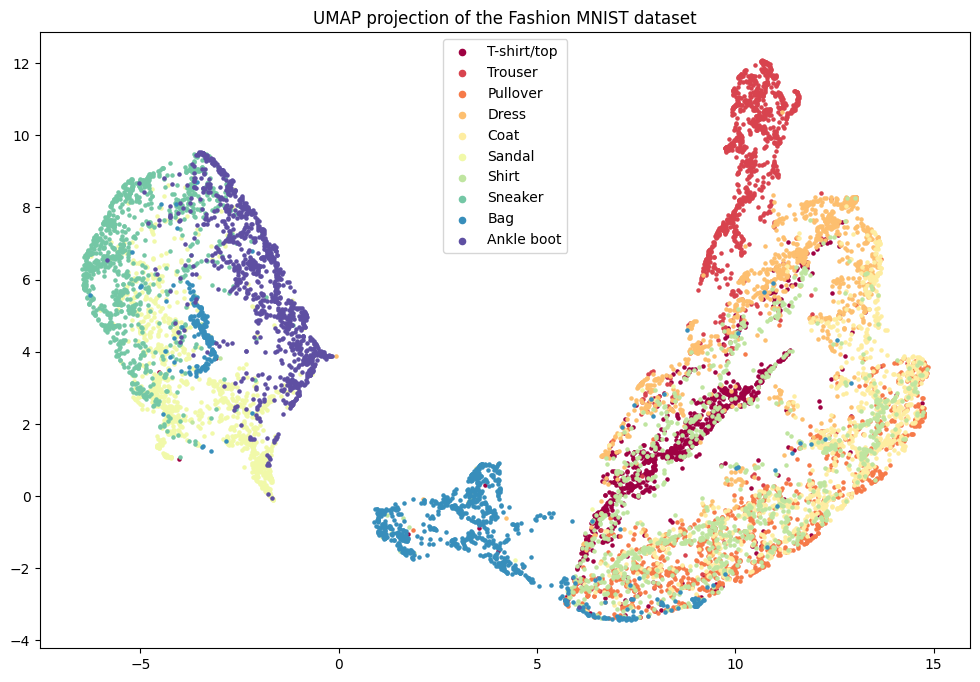

In [11]:
autoencoder.forward(x_test)
encoded = autoencoder.layers[1].outputs

reducer = umap.UMAP()
umap_embeddings = reducer.fit_transform(encoded)

plt.figure(figsize=(12, 8))
unique_labels = np.unique(y_test)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    indices = np.where(y_test == label)
    plt.scatter(umap_embeddings[indices, 0], umap_embeddings[indices, 1], color=colors[i],
                label=FASHION_MNIST_LABELS[label], s=5)

plt.legend(markerscale=2)
plt.title('UMAP projection of the Fashion MNIST dataset')
plt.show()

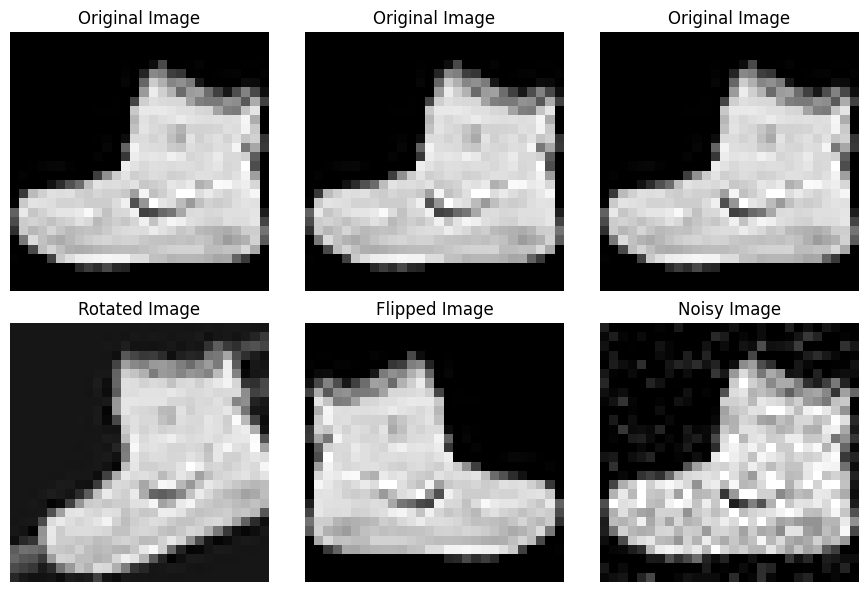

In [3]:
from utils import rotate_image, flip_image, add_noise

original_image = x_train[0]

rotated_image = rotate_image(original_image, angle=20)
flipped_image = flip_image(original_image)
noisy_image = add_noise(original_image, noise_level=0.1)

plt.figure(figsize=(9, 6))

plt.subplot(2, 3, 1)
plt.imshow(original_image.reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(original_image.reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(original_image.reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(rotated_image.reshape(28, 28), cmap='gray')
plt.title("Rotated Image")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(flipped_image.reshape(28, 28), cmap='gray')
plt.title("Flipped Image")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(noisy_image.reshape(28, 28), cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
classifier.evaluate(x_test, y_test_one_hot)

Accuracy: 88.43%


In [13]:
classifier_from_encoded.evaluate(encoded, y_test_one_hot)

Accuracy: 83.30%
